<a href="https://colab.research.google.com/github/cheesedog-paradise/dl01/blob/main/project/dl01_prj03_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN
## MNIST

In [2]:
# import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# import keras

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(train_images.shape, train_labels.shape)
# 픽셀 값을 0~1 사이로 정규화한다. 
train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential()
# CNN
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# DNN
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000,)


In [3]:
9*32*64+64

18496

In [4]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

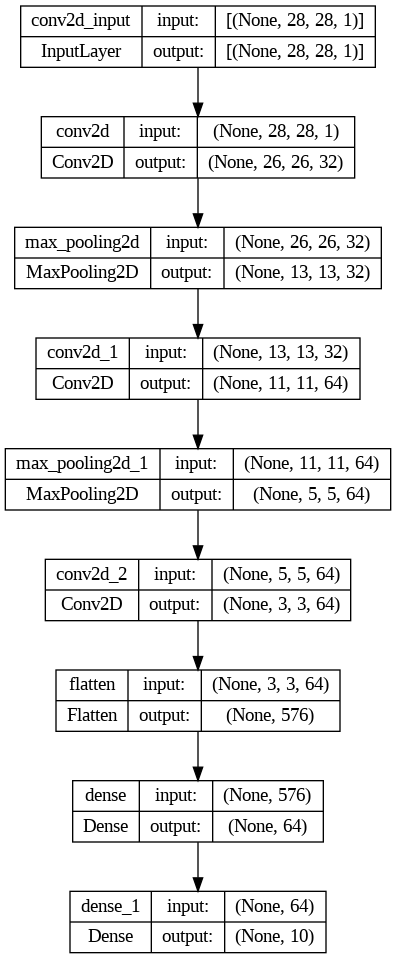

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)



In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)



Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.1509 - accuracy: 0.9518
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0463 - accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0331 - accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0268 - accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0195 - accuracy: 0.9935
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0161 - accuracy: 0.9949
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0137 - accuracy: 0.9958
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0112 - accuracy: 0.9965
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0102 - accuracy: 0.9967
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.00

In [ ]:
#
# [DIY-1] training history를 이용홰서 loss와 accuracy 그래프 그리기
#

#
# [DIY-2] test 데이터에 모델 적용하고 정확도 계산
#

#
# [Prj-3] test 데이터를 validation으로 설정해서 모델을 다시 훈련시키시오.
# 그리고 training history를 이용해서 loss, val_loss와 accuracy, val-accuracy 그래프 그리기
# file name: dlxx_prj03_CNN_MNIST.ipynb
# 깃허브의 project 폴더에 저장하시오.
#



# 여기부터 프로젝트

## DIY-1

In [11]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0065 - accuracy: 0.9982
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0037 - accuracy: 0.9990
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0047 - accuracy: 0.9985
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0043 - accuracy: 0.9988
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0052 - accuracy: 0.9986
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0054 - accuracy: 0.9984
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0028 - accuracy: 0.9991
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0053 - accuracy: 0.9985
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0044 - accuracy: 0.9988
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.002

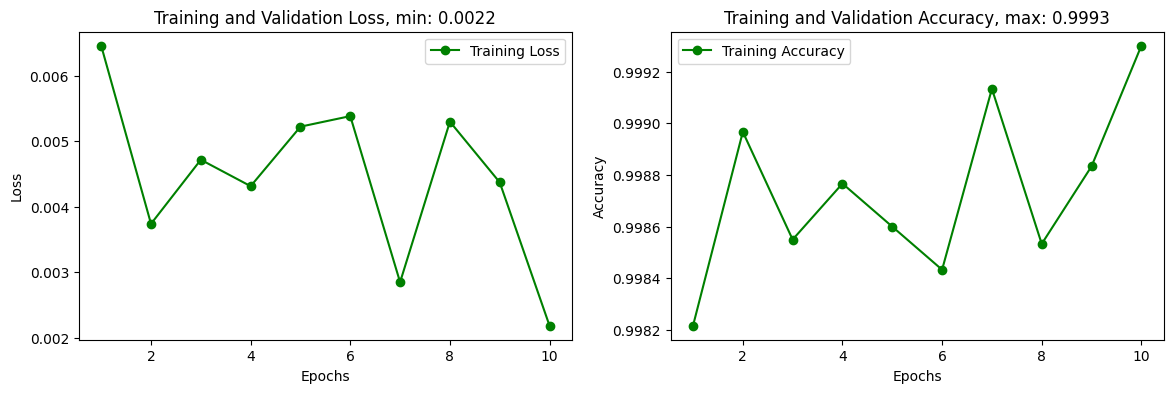

In [13]:
import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.title('Training and Validation Loss, min: ' + str(np.round(loss[np.argmin(np.array(loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.title('Training and Validation Accuracy, max: ' + str(np.round(acc[np.argmax(np.array(acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## DIY-2

In [14]:
model.fit(test_images, test_labels, epochs=10)

Epoch 1/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0503 - accuracy: 0.9886
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0066 - accuracy: 0.9981
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 9.9857e-04 - accuracy: 0.9998
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 2.5001e-04 - accuracy: 0.9999
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 1.5555e-04 - accuracy: 1.0000
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 1.0598e-04 - accuracy: 1.0000
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 7.2874e-05 - accuracy: 1.0000
Epoch 8/10
313/313 [==============================] - 1s 4ms/step - loss: 5.2607e-05 - accuracy: 1.0000
Epoch 9/10
313/313 [==============================] - 1s 4ms/step - loss: 3.9651e-05 - accuracy: 1.0000
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - los

## DIY-3

In [7]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.0343 - val_accuracy: 0.9914
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.0385 - val_accuracy: 0.9911
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0378 - val_accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0360 - val_accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0370 - val_accuracy: 0.9921
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.0519 - val_accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0400 - val_accuracy:

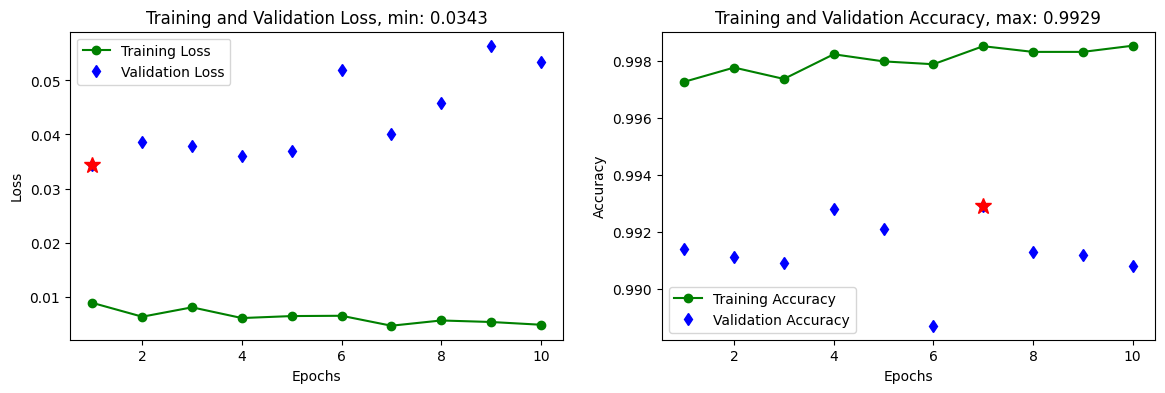

In [10]:
import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()